In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('whole_table_with_lemm.csv', sep='\t')

In [100]:
df = df.iloc[3: -1].drop('Unnamed: 0', axis=1)

In [104]:
df = df.rename(columns={'notes\n': 'lem_notes'})

In [106]:
df['year'] = df['dates'].apply(lambda x: x[:x.find('/')])

In [157]:
df

,notes,lem_notes,dates,id,author,year
0,18 Августа Его Королевское Величество отправил...,18 август его королевский величество отправлят...,1609/8/18,1081,Самуил Бельский,1609
1,"На следующий день, 19 Августа, прибыл в Остров...","на следующий день, 19 август, прибывать в остр...",1609/8/19,1081,Самуил Бельский,1609
2,"20 к ночи, прибыль в Сморгонь.","20 к ночь, прибыль в сморгонь.\n",1609/8/20,1081,Самуил Бельский,1609
3,"21 к ночи, прибыл в Мархов.","21 к ночь, прибывать в марх.\n",1609/8/21,1081,Самуил Бельский,1609
4,"22, к ночи, дошел до Молодочны, куда прибыл ко...","22, к ночь, доходить до молодочный, куда прибы...",1609/8/22,1081,Самуил Бельский,1609
...,...,...,...,...,...,...
384517,Человек не может сам судить себя. Пусть меня с...,человек не мочь сам судить себя. пусть я судит...,2018/5/28,2378,Александр Михайлович Чугунов,2018
384518,"Вся моя личная жизнь является чудом Божиим, вс...","весь мой личный жизнь являться чудо божий, вес...",2018/6/3,2378,Александр Михайлович Чугунов,2018
384519,"Может быть, то место, где я сейчас нахожусь, г...","мочь быть, то место, где я сейчас находиться, ...",2018/6/12,2378,Александр Михайлович Чугунов,2018
384520,"Если взглянуть на мою жизнь, прожитые годы, то...","если взглядывать на мой жизнь, проживать год, ...",2018/6/13,2378,Александр Михайлович Чугунов,2018


In [158]:
df = df.dropna().reset_index(drop=True)

In [159]:
df

,notes,lem_notes,dates,id,author,year
0,18 Августа Его Королевское Величество отправил...,18 август его королевский величество отправлят...,1609/8/18,1081,Самуил Бельский,1609
1,"На следующий день, 19 Августа, прибыл в Остров...","на следующий день, 19 август, прибывать в остр...",1609/8/19,1081,Самуил Бельский,1609
2,"20 к ночи, прибыль в Сморгонь.","20 к ночь, прибыль в сморгонь.\n",1609/8/20,1081,Самуил Бельский,1609
3,"21 к ночи, прибыл в Мархов.","21 к ночь, прибывать в марх.\n",1609/8/21,1081,Самуил Бельский,1609
4,"22, к ночи, дошел до Молодочны, куда прибыл ко...","22, к ночь, доходить до молодочный, куда прибы...",1609/8/22,1081,Самуил Бельский,1609
...,...,...,...,...,...,...
384516,Человек не может сам судить себя. Пусть меня с...,человек не мочь сам судить себя. пусть я судит...,2018/5/28,2378,Александр Михайлович Чугунов,2018
384517,"Вся моя личная жизнь является чудом Божиим, вс...","весь мой личный жизнь являться чудо божий, вес...",2018/6/3,2378,Александр Михайлович Чугунов,2018
384518,"Может быть, то место, где я сейчас нахожусь, г...","мочь быть, то место, где я сейчас находиться, ...",2018/6/12,2378,Александр Михайлович Чугунов,2018
384519,"Если взглянуть на мою жизнь, прожитые годы, то...","если взглядывать на мой жизнь, проживать год, ...",2018/6/13,2378,Александр Михайлович Чугунов,2018


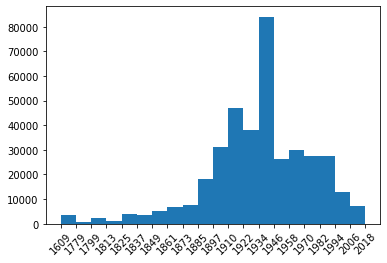

In [133]:
num_bins = 20
n, bins, _ = plt.hist(df['year'], bins=num_bins)
plt.xticks(ticks=bins, rotation='45')
plt.show()

In [119]:
def find_century(df, century, year_column_name='year'):
    return df[df[year_column_name].apply(lambda x: int(x[:2]) + 1 == century)]

In [110]:
find_century(df, 17)

,notes,lem_notes,dates,id,author,year
0,18 Августа Его Королевское Величество отправил...,18 август его королевский величество отправлят...,1609/8/18,1081,Самуил Бельский,1609
1,"На следующий день, 19 Августа, прибыл в Остров...","на следующий день, 19 август, прибывать в остр...",1609/8/19,1081,Самуил Бельский,1609
2,"20 к ночи, прибыль в Сморгонь.","20 к ночь, прибыль в сморгонь.\n",1609/8/20,1081,Самуил Бельский,1609
3,"21 к ночи, прибыл в Мархов.","21 к ночь, прибывать в марх.\n",1609/8/21,1081,Самуил Бельский,1609
4,"22, к ночи, дошел до Молодочны, куда прибыл ко...","22, к ночь, доходить до молодочный, куда прибы...",1609/8/22,1081,Самуил Бельский,1609
...,...,...,...,...,...,...
3548,27 May 1669. \nTo the office all the mornin...,27 May 1669. \nTo the office all the mornin...,1669/5/27,1009,Samuel Сэмюэл Пипс Pepys,1669
3549,"28 May 1669. \nAt St. James’s, where the Ki...","28 May 1669. \nAt St. James’s, where the Ki...",1669/5/28,1009,Samuel Сэмюэл Пипс Pepys,1669
3550,29 May 1669. \nThe King’s birth-day. To Whi...,29 May 1669. \nThe King’s birth-day. To Whi...,1669/5/29,1009,Samuel Сэмюэл Пипс Pepys,1669
3551,"30 May 1669. \nTo White Hall, and thence to...","30 May 1669. \nTo White Hall, and thence to...",1669/5/30,1009,Samuel Сэмюэл Пипс Pepys,1669


In [124]:
def find_year_interval(df, year_low, year_high, year_column_name='year'):
    return df[df[year_column_name].apply(lambda x: year_high >= int(x) >= year_low)]

In [125]:
find_year_interval(df, 1799, 2018)

,notes,lem_notes,dates,id,author,year
4175,"Когда родился, не помню, а что делал, не забыл...","когда родиться, не помнить, а что делать, не з...",1799/9/16,851,Иван Васильевич Июдин,1799
4176,"Первое дорожное неудовольствие, случившееся в ...","первый дорожный неудовольствие, случаться в Kl...",1802/2/1,2100,Иван Иванович Вальберх,1802
4177,Рига \n[...] Рига — город большой и торговы...,рига \n[...] рига — город большой и торговы...,1802/2/4,2100,Иван Иванович Вальберх,1802
4178,Митава \n[...] Везенкруг — корчма за 8 верс...,митава \n[...] везенкруг — корчма за 8 верс...,1802/2/5,2100,Иван Иванович Вальберх,1802
4179,"[...] Итак, уже я вне отчизны моей! Вне России...","[...] итак, уже я вне отчизна мой! вне россия,...",1802/2/11,2100,Иван Иванович Вальберх,1802
...,...,...,...,...,...,...
384517,Человек не может сам судить себя. Пусть меня с...,человек не мочь сам судить себя. пусть я судит...,2018/5/28,2378,Александр Михайлович Чугунов,2018
384518,"Вся моя личная жизнь является чудом Божиим, вс...","весь мой личный жизнь являться чудо божий, вес...",2018/6/3,2378,Александр Михайлович Чугунов,2018
384519,"Может быть, то место, где я сейчас нахожусь, г...","мочь быть, то место, где я сейчас находиться, ...",2018/6/12,2378,Александр Михайлович Чугунов,2018
384520,"Если взглянуть на мою жизнь, прожитые годы, то...","если взглядывать на мой жизнь, проживать год, ...",2018/6/13,2378,Александр Михайлович Чугунов,2018


In [267]:
def make_list_year_intervals(year_low, year_high, year_split_interval):
    years = list(range(year_low, year_high, year_split_interval))
    year_intervals = [str(year_low) + '-' + str(year_low + year_split_interval)]
    year_intervals += [str(years[i] + 1) + '-' + str(years[i + 1]) for i in range(1, len(years) - 1)]
    if len(year_intervals) != len(interval_idx_2_word_occurence):
        year_intervals.append(str(year_intervals[-1][-4:]) + '-' + str(year_high))
    return year_intervals

In [268]:
def word_evolution_hist(df, word, 
                        lemmatized_texts_col='lem_notes', 
                        year_low=1799, year_high=2018, year_split_interval=5):
    
    year_slice_df = find_year_interval(df, year_low, year_high)
    if_word_in_note_mask = year_slice_df[lemmatized_texts_col].apply(lambda x: word in set(x.split()))
    year_slice_df = find_year_interval(df, year_low, year_high)
    
    year_slice_df['if_word_in_note'] = year_slice_df[lemmatized_texts_col].\
                            apply(lambda text: word in set(text.split()))
    
    year_2_interval_idx = {year: (year - year_low) // year_split_interval 
                            for year in range(year_low, year_high + 1)}
    year_slice_df['year_inteval'] = year_slice_df['year'].\
                            apply(lambda x: year_2_interval_idx[int(x)])
    
    interval_idx_2_word_occurence = round(year_slice_df.groupby('year_inteval')['if_word_in_note'].mean() * 100, 1)
    
    #visualization
    year_intervals = make_list_year_intervals(year_low, year_high, year_split_interval)
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1,1, figsize=(30, 10))
    ax.plot(range(len(year_intervals)), interval_idx_2_word_occurence )
    ax.set_xticks(range(len(year_intervals)))
    ax.set_xticklabels(year_intervals, rotation=45)
    plt.show()
    return interval_idx_2_word_occurence
                                    

In [ ]:
word_occurences = word_evolution_hist(df, 'пушкин')